In [1]:
import pandas as pd
import numpy as np

In [6]:
from tensorflow.keras.datasets import fashion_mnist, mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('train dataset shape:', train_images.shape, train_labels.shape)
print('test dataset shape:', test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


Text(0.5, 1.0, 'Ankle boot')

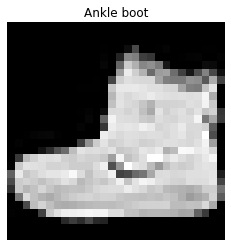

In [74]:
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.imshow(train_images[0], cmap='gray')
plt.axis('off')
plt.title(class_names[train_labels[0]])

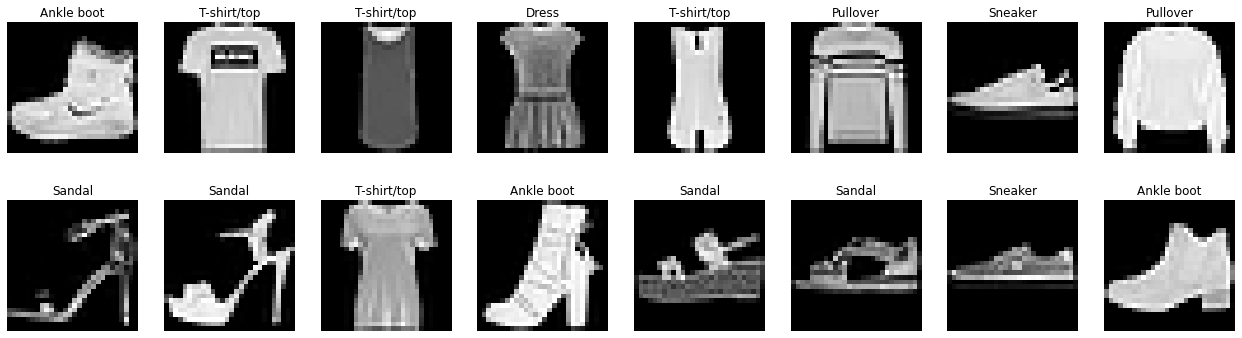

In [75]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(22,6))
for i in range(16):
  plt.subplot(2,8,i+1)
  plt.axis('off')
  plt.imshow(train_images[i], cmap='gray')
  plt.title(class_names[train_labels[i]])

# def show_images(images, labels, ncols=8):
#     figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
#     for i in range(ncols):
#       axs[i].imshow(images[i], cmap='gray')
#       axs[i].set_title(class_names[labels[i]])
# show_images(train_images[:8], train_labels[:8], ncols=8)
# show_images(train_images[8:16], train_labels[8:16], ncols=8)

In [88]:
# 데이터 전처리 0~255 를 0~1 값으로

def get_new_data(images, labels):
  images = np.array(images/255, dtype=np.float32)
  labels = np.array(labels, dtype=np.float32)
  return images, labels

train_images, train_labels = get_new_data(train_images, train_labels)
test_images, test_labels = get_new_data(test_images, test_labels)

print('train dataset shape:', train_images.shape, train_labels.shape)
print('test dataset shape:', test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [104]:
# 모델 설정
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

input_size = 28

model = Sequential([
                    Flatten(input_shape=(input_size, input_size)),
                    Dense(100, activation='relu'),
                    Dense(30, activation='relu'),
                    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [129]:
# 모델 Loss와 Optimizer 설정, 학습 수행
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# OneHot 인코딩
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder()
a = train_labels.reshape(-1,1)
b = test_labels.reshape(-1,1)
OHE.fit(a)
OHE.fit(b)
train_oh_labels2 = OHE.transform(a).toarray()
test_oh_labels2 = OHE.transform(b).toarray()
print(train_oh_labels2.shape,test_oh_labels2.shape)

from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels) 
test_oh_labels = to_categorical(test_labels)
print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)
(60000, 10) (10000, 10)


In [ ]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

In [133]:
print(len(history.history['loss']))
print(len(history.history['accuracy']))

20
20


In [134]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)

(10000, 10)


In [145]:
print(pred_proba[0],test_oh_labels[0])

[3.1481888e-09 1.6463396e-08 3.6245902e-11 1.2586806e-09 1.9456387e-12
 1.5242164e-06 1.1919352e-10 1.0165514e-02 2.4019030e-11 9.8983288e-01] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [147]:
# 28x28 데이터를 1x28x28로 변경
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [158]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax 결과:',pred_proba)

#squeeze함수 3차원에서 2차원으로 줄이기
pred = np.argmax(np.squeeze(pred_proba))
print(pred)

pred2 = np.argmax(pred_proba[0])
print(pred2)

softmax 결과: [[3.1481888e-09 1.6463396e-08 3.6245902e-11 1.2586806e-09 1.9456387e-12
  1.5242164e-06 1.1919352e-10 1.0165514e-02 2.4019030e-11 9.8983288e-01]]
9
9


In [150]:
print('target class value:', test_labels[0], 'predicted class value:', pred)

target class value: 9.0 predicted class value: 9


In [153]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 1s 4ms/step - loss: 0.3715 - accuracy: 0.8853


[0.3714611530303955, 0.8852999806404114]

In [164]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2021)
print(tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)
print(tr_oh_labels.shape, val_oh_labels.shape)

(51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
(51000, 10) (9000, 10)


In [166]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

input_size = 28

model = Sequential([
                    Flatten(input_shape=(input_size, input_size)),
                    Dense(100, activation='relu'),
                    Dense(30, activation='relu'),
                    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), epochs=20, verbose=1)

In [168]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.6059591770172119, 0.4239782989025116, 0.3764757215976715, 0.3497190475463867, 0.3323937654495239, 0.3155859112739563, 0.29998156428337097, 0.2903415560722351, 0.2812483012676239, 0.2722005248069763, 0.2644854784011841, 0.2582000494003296, 0.2481057196855545, 0.24361839890480042, 0.23402805626392365, 0.23058392107486725, 0.2241237759590149, 0.22106175124645233, 0.21499650180339813, 0.20893748104572296]
[0.7922941446304321, 0.8523725271224976, 0.8657842874526978, 0.8744117617607117, 0.8790000081062317, 0.8854117393493652, 0.8915489912033081, 0.8933333158493042, 0.8958627581596375, 0.900352954864502, 0.9027842879295349, 0.9051960706710815, 0.9091372489929199, 0.9094313979148865, 0.9121176600456238, 0.9144706130027771, 0.91584312915802, 0.9171960949897766, 0.9203529357910156, 0.9217843413352966]
[0.4487939476966858, 0.423200398683548, 0.39901378750801086, 0.3743225932121277, 0.3437792658805847, 0.3388593792915344, 0.3431706130504608, 0.3285398483276367, 0.3312796652317047, 0.32512989640

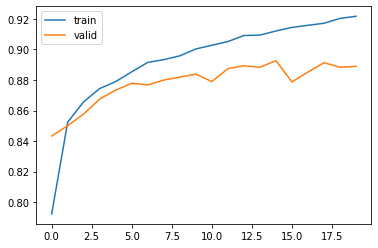

In [169]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

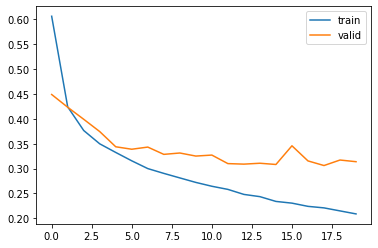

In [170]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()

In [172]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

input_size = 28

model = Sequential([
                    Flatten(input_shape=(input_size, input_size)),
                    Dense(100, activation='relu'),
                    Dense(30, activation='relu'),
                    Dense(10, activation='softmax')
])

In [179]:
model1 = Sequential()
model1.add(Flatten(input_shape=(input_size, input_size)))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(30, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 30)                3030      
                                                                 
 dense_20 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [182]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_tensor = Input(shape=(input_size,input_size))
x = Flatten()(input_tensor)
x = Dense(100, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 100)               78500     
                                                                 
 dense_25 (Dense)            (None, 30)                3030      
                                                                 
 dense_26 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________
